In [51]:
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [2]:
#read in CSV
df = pd.read_csv('listings.csv')
# print the first few rows
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20230319041143,2023-03-19,city scrape,Hyde Park - Walk to UChicago,You are invited to be the sole Airbnb guest in...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/acf6b3c0-47f2...,2613,...,4.99,4.96,4.93,R17000015609,f,1,0,1,0,2.13
1,1772920,https://www.airbnb.com/rooms/1772920,20230319041143,2023-03-19,city scrape,3 Bedroom Across from Wrigley Field AllStar Suite,"Welcome to The Inn at Wrigleyville, where you ...","Besides being steps from the ""Friendly Confine...",https://a0.muscache.com/pictures/28490752/b4cc...,9297431,...,4.75,4.92,4.58,2446868,t,6,6,0,0,0.11
2,1773021,https://www.airbnb.com/rooms/1773021,20230319041143,2023-03-19,city scrape,4 Bedroom Across from Wrigley Field Stadium Suite,"Welcome to The Inn at Wrigleyville, where you ...","Besides being steps from the ""Friendly Confine...",https://a0.muscache.com/pictures/28491077/6edb...,9297431,...,4.88,5.00,4.85,2446868,t,6,6,0,0,1.11
3,1773025,https://www.airbnb.com/rooms/1773025,20230319041143,2023-03-19,city scrape,4 Bedroom Across from Wrigley Field Legend Suite,"Welcome to The Inn at Wrigleyville, where you ...","Besides being steps from the ""Friendly Confine...",https://a0.muscache.com/pictures/28489088/cb9d...,9297431,...,4.90,5.00,4.76,2446867,t,6,6,0,0,0.90
4,1810118,https://www.airbnb.com/rooms/1810118,20230319041143,2023-03-19,city scrape,LARGE Private 1BR/Full Bath near U of Chicago,LARGE Bedroom (22'x12' / 24.5m²) w/ private-ac...,Wake up and stop by the Robust Coffee shop for...,https://a0.muscache.com/pictures/miso/Hosting-...,9483312,...,4.96,4.48,4.88,R17000015592,f,2,1,1,0,3.21


In [3]:
#check length of dataframe

len(df)


7747

In [4]:
# check to make sure all entries are in Chicago

df["neighbourhood"].value_counts()


Chicago, Illinois, United States              5421
Oak Park, Illinois, United States               10
Chicago , Illinois, United States                4
Chicago, United States                           2
Norridge, Illinois, United States                2
Harwood Heights, Illinois, United States         2
Chicago Heights, Illinois, United States         1
Bucktown, Chicago, Illinois, United States       1
Oak Lawn, Illinois, United States                1
Rogers Park, Il, United States                   1
Santa Barbara, California, United States         1
Chicago, Il, United States                       1
芝加哥, Illinois, United States                     1
Evergreen Park, Illinois, United States          1
Name: neighbourhood, dtype: int64

In [5]:
#drop rows of locations not within Chicago limits

undesired_values = ['Oak Park, Illinois, United States',
                    'Norridge, Illinois, United States',
                    'Harwood Heights, Illinois, United States',
                    'Chicago Heights, Illinois, United States',
                    'Oak Lawn, Illinois, United States',
                    'Santa Barbara, California, United States']

df = df[~df['neighbourhood'].isin(undesired_values)]


In [6]:
#recheck values
df["neighbourhood"].value_counts()

Chicago, Illinois, United States              5421
Chicago , Illinois, United States                4
Chicago, United States                           2
Bucktown, Chicago, Illinois, United States       1
Rogers Park, Il, United States                   1
Chicago, Il, United States                       1
芝加哥, Illinois, United States                     1
Evergreen Park, Illinois, United States          1
Name: neighbourhood, dtype: int64

In [7]:
#drop columns not needed for model

df_dropped = df.drop(columns=["id", "name", "host_id", "host_name", "number_of_reviews_ltm",
                              "number_of_reviews_l30d", "maximum_nights", "host_total_listings_count",
                              "minimum_minimum_nights", "maximum_minimum_nights", "host_listings_count",
                              "room_type", "last_review", "first_review", "host_picture_url",
                              "host_since", "listing_url", "scrape_id", "last_scraped", "source",
                              "description", "neighborhood_overview", "picture_url",
                              "host_url", "host_location", "host_about", "host_response_time",
                              "host_response_rate", "host_acceptance_rate", "host_thumbnail_url",
                              "host_verifications", "host_has_profile_pic", "host_identity_verified",
                              "neighbourhood", "neighbourhood_cleansed", "neighbourhood_group_cleansed",
                              "license", "instant_bookable", "calculated_host_listings_count",
                              "calculated_host_listings_count_entire_homes",
                              "calculated_host_listings_count_private_rooms",
                              "calculated_host_listings_count_shared_rooms", "minimum_maximum_nights",
                              "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
                              "calendar_updated", "has_availability", "availability_30", "availability_60",
                              "availability_90", "availability_365", "calendar_last_scraped", "bathrooms",
                            "amenities", "host_neighbourhood"])



In [8]:
pd.set_option('display.max_columns', None)
df_dropped.head()

,host_is_superhost,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,t,41.78790,-87.58780,Private room in condo,1,1 shared bath,1.0,1.0,$90.00,3,212,4.99,4.98,4.99,4.99,4.99,4.96,4.93,2.13
1,t,41.94842,-87.65307,Entire rental unit,7,2 baths,3.0,5.0,$379.00,1,13,4.67,4.67,4.75,4.42,4.75,4.92,4.58,0.11
2,t,41.94774,-87.65421,Entire rental unit,9,2 baths,4.0,5.0,$479.00,1,26,4.92,4.92,4.92,4.96,4.88,5.00,4.85,1.11
3,t,41.94750,-87.65420,Entire rental unit,9,2 baths,4.0,5.0,$479.00,1,21,4.86,5.00,4.81,4.95,4.90,5.00,4.76,0.90
4,t,41.77738,-87.60041,Private room in home,3,1 private bath,1.0,1.0,$79.00,4,355,4.89,4.93,4.93,4.96,4.96,4.48,4.88,3.21


In [9]:
#check for data types
df_dropped.dtypes

host_is_superhost               object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
price                           object
minimum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [10]:
#convert price column from object to int

df_dropped["price"] = df_dropped["price"].str.replace("$", "").str.replace(",", "").astype(float)


C:\Users\Genevieve Nimeth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# check that conversion worked
df_dropped.dtypes

host_is_superhost               object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [12]:
df_dropped

,host_is_superhost,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,t,41.78790,-87.58780,Private room in condo,1,1 shared bath,1.0,1.0,90.0,3,212,4.99,4.98,4.99,4.99,4.99,4.96,4.93,2.13
1,t,41.94842,-87.65307,Entire rental unit,7,2 baths,3.0,5.0,379.0,1,13,4.67,4.67,4.75,4.42,4.75,4.92,4.58,0.11
2,t,41.94774,-87.65421,Entire rental unit,9,2 baths,4.0,5.0,479.0,1,26,4.92,4.92,4.92,4.96,4.88,5.00,4.85,1.11
3,t,41.94750,-87.65420,Entire rental unit,9,2 baths,4.0,5.0,479.0,1,21,4.86,5.00,4.81,4.95,4.90,5.00,4.76,0.90
4,t,41.77738,-87.60041,Private room in home,3,1 private bath,1.0,1.0,79.0,4,355,4.89,4.93,4.93,4.96,4.96,4.48,4.88,3.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7742,f,41.92499,-87.65573,Entire rental unit,6,1 bath,2.0,3.0,86.0,32,51,4.30,4.57,4.24,4.13,4.13,4.92,4.35,0.33
7743,t,41.92137,-87.67932,Entire loft,6,2 baths,3.0,3.0,157.0,2,169,4.77,4.84,4.73,4.92,4.84,4.91,4.67,1.13
7744,f,41.97303,-87.66567,Private room in home,2,1.5 shared baths,1.0,1.0,110.0,3,250,4.99,4.99,5.00,4.99,4.98,4.92,4.98,1.62
7745,t,41.89615,-87.67934,Private room in rental unit,2,1 shared bath,1.0,1.0,84.0,3,101,4.87,4.92,4.71,4.95,4.93,4.82,4.80,0.70


In [13]:
#check for NaN values

na_counts = df_dropped.isna().sum()
na_counts

host_is_superhost                 1
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bathrooms_text                   14
bedrooms                        582
beds                             66
price                             0
minimum_nights                    0
number_of_reviews                 0
review_scores_rating           1492
review_scores_accuracy         1506
review_scores_cleanliness      1506
review_scores_checkin          1506
review_scores_communication    1507
review_scores_location         1506
review_scores_value            1506
reviews_per_month              1492
dtype: int64

In [14]:
#drop all NaNs as the numbers most the NaN values are consistent across all review categories 

df_dropped.dropna(inplace=True)

In [15]:
#check length of data frame

length_of_df = len(df_dropped)

length_of_df


5743

In [16]:
#look at variables in the property_type column

unique_values = df_dropped['property_type'].unique()
unique_values


array(['Private room in condo', 'Entire rental unit',
       'Private room in home', 'Entire condo',
       'Private room in townhouse', 'Private room in hostel',
       'Shared room in hostel', 'Private room in rental unit',
       'Entire home', 'Entire serviced apartment', 'Entire guest suite',
       'Private room in guest suite', 'Shared room in rental unit',
       'Entire loft', 'Private room in loft', 'Entire guesthouse',
       'Room in boutique hotel', 'Entire townhouse', 'Room in aparthotel',
       'Entire bungalow', 'Private room in bungalow',
       'Room in serviced apartment', 'Private room in farm stay',
       'Private room in bed and breakfast', 'Private room in cottage',
       'Shared room in home', 'Room in hostel',
       'Private room in tiny home', 'Private room in guesthouse',
       'Private room', 'Shared room in condo', 'Tiny home',
       'Entire villa', 'Room in hotel',
       'Private room in serviced apartment',
       'Private room in casa particular',

In [17]:
#get a count for each type

df_dropped['property_type'].value_counts()


Entire rental unit                    2700
Entire condo                           738
Private room in rental unit            500
Entire home                            443
Private room in home                   397
Private room in condo                  148
Entire guest suite                     148
Entire townhouse                       101
Entire serviced apartment               95
Room in boutique hotel                  72
Entire loft                             64
Private room in townhouse               53
Entire guesthouse                       37
Shared room in home                     32
Private room in loft                    28
Private room in bed and breakfast       25
Private room in bungalow                25
Room in hotel                           24
Shared room in rental unit              23
Private room in guest suite             21
Entire vacation home                    15
Entire bungalow                          9
Private room in guesthouse               8
Room in hos

In [18]:
# replace the values in "property_type" column to streamline

df_dropped['property_type'] = df_dropped['property_type'].replace({
    'Private room in home': 'Private room in rental unit',
    'Private room in condo': 'Private room in rental unit',
    'Private room in townhouse': 'Private room in rental unit',
    'Private room in loft': 'Private room in rental unit',
    'Private room in bed and breakfast': 'Private room in rental unit',
    'Private room in bungalow': 'Private room in rental unit',
    'Private room in guest suite': 'Private room in rental unit',
    'Private room in guesthouse': 'Private room in rental unit',
    'Private room in serviced apartment': 'Private room in rental unit',
    'Private room in hostel': 'Private room in rental unit',
    'Private room in cottage': 'Private room in rental unit',
    'Private room in casa particular': 'Private room in rental unit',
    'Private room in farm stay': 'Private room in rental unit',
    'Private room in villa': 'Private room in rental unit',
    'Private room in tiny home': 'Private room in rental unit',
    'Private room in minsu': 'Private room in rental unit',
    'Private room': 'Private room in rental unit',
    'Entire home/apt': 'Entire home',
    'Entire vacation home': 'Entire home',
    'Entire villa': 'Entire home',
    'Entire bungalow': 'Entire home',
    'Casa particular': 'Entire home',
    'Shared room in condo': 'Shared room in rental unit',
    'Room in aparthotel': 'Room in hotel'
})


In [19]:
#check to ensure all were combined properly

df_dropped['property_type'].value_counts()


Entire rental unit             2700
Private room in rental unit    1222
Entire condo                    738
Entire home                     471
Entire guest suite              148
Entire townhouse                101
Entire serviced apartment        95
Room in boutique hotel           72
Entire loft                      64
Entire guesthouse                37
Shared room in home              32
Room in hotel                    26
Shared room in rental unit       25
Room in hostel                    5
Shared room in hostel             3
Tiny home                         3
Room in serviced apartment        1
Name: property_type, dtype: int64

In [20]:
#check bathroom types

df_dropped['bathrooms_text'].unique()


array(['1 shared bath', '2 baths', '1 private bath', '1 bath',
       '1.5 shared baths', '11 shared baths', '1.5 baths', '2.5 baths',
       '3 baths', '2 shared baths', '0 shared baths', '3.5 baths',
       '2.5 shared baths', '3 shared baths', '4 baths',
       'Shared half-bath', '4.5 baths', '0 baths', '5 baths',
       'Private half-bath', '11.5 shared baths', '4 shared baths',
       '6.5 baths', '7 baths', '5.5 baths', '6 baths', 'Half-bath',
       '9.5 baths', '7.5 baths'], dtype=object)

In [21]:
#get count of bathroom types

df_dropped['bathrooms_text'].value_counts()


1 bath               2802
2 baths              1020
1 shared bath         599
1 private bath        325
2 shared baths        178
1.5 baths             176
2.5 baths             156
3 baths               136
1.5 shared baths      105
3.5 baths              82
4 baths                47
3 shared baths         27
2.5 shared baths       22
4.5 baths              14
4 shared baths         14
6 baths                 9
5 baths                 7
11 shared baths         4
7 baths                 4
5.5 baths               3
0 shared baths          2
6.5 baths               2
7.5 baths               2
0 baths                 2
Private half-bath       1
Shared half-bath        1
Half-bath               1
9.5 baths               1
11.5 shared baths       1
Name: bathrooms_text, dtype: int64

In [22]:
#list object types
df_dropped.dtypes

host_is_superhost               object
latitude                       float64
longitude                      float64
property_type                   object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

In [23]:
#explore values of price

# calculate the IQR and bounds
q1 = df_dropped['price'].quantile(0.25)
q3 = df_dropped['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# identify outliers
outliers = df_dropped[(df_dropped['price'] < lower_bound) | (df_dropped['price'] > upper_bound)]

# identify price outliers
price_outliers = outliers['price'].sort_values()

# print the result
print(price_outliers)

1175      363.0
5916      363.0
4549      363.0
1808      364.0
6362      364.0
         ...   
2013     2599.0
7262     2960.0
977      5060.0
517     10000.0
1335    99998.0
Name: price, Length: 414, dtype: float64


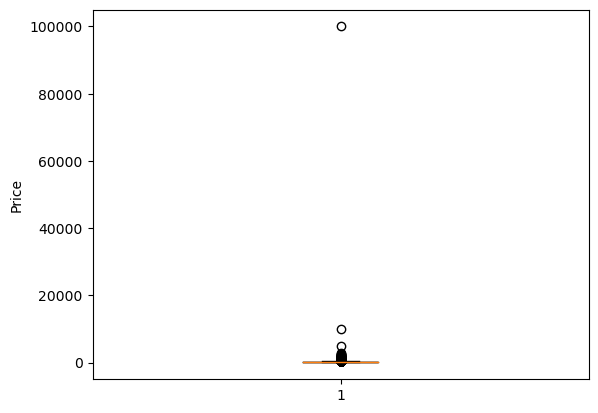

In [24]:
# Create a box and whisker plot showing only outliers for the price column
plt.boxplot(df_dropped['price'], showfliers=True)

# Set the y-axis label
plt.ylabel('Price')

# Display the plot
plt.show()


In [25]:
#look at top 10 highest prices

top10 = df_dropped['price'].nlargest(10)

# print the result
print(top10)

1335    99998.0
517     10000.0
977      5060.0
7262     2960.0
2013     2599.0
4015     2429.0
2151     2380.0
2111     2249.0
606      2221.0
2047     2000.0
Name: price, dtype: float64


In [26]:
# sort values by price in descending order
df_dropped = df_dropped.sort_values('price', ascending=False)

# drop the top 3 highest values
n = 3
df_dropped = df_dropped.iloc[n:]

# reset the index
df_dropped = df_dropped.reset_index(drop=True)

In [27]:
#Create dummies for bathroom_text and host_is_superhost 
dummies = pd.get_dummies(df_dropped[['bathrooms_text', 'host_is_superhost', 'property_type']])


#Display sample data
dummies


,bathrooms_text_0 baths,bathrooms_text_0 shared baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_11 shared baths,bathrooms_text_11.5 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_7.5 baths,bathrooms_text_9.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,host_is_superhost_f,host_is_superhost_t,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Private room in rental unit,property_type_Room in boutique hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in rental unit,property_type_Tiny home
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5736,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5737,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5738,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Scale the data in prep for the model
data_scaled = StandardScaler().fit_transform(df_dropped[['latitude', 'longitude', 'accommodates', 'bedrooms',
                                                      'beds', 'price', 'minimum_nights', 'number_of_reviews',
                                                      'review_scores_rating', 'review_scores_accuracy',
                                                      'review_scores_cleanliness','review_scores_checkin',
                                                      'review_scores_communication', 'review_scores_location',
                                                       'review_scores_value', 'reviews_per_month']])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(data_scaled, columns=['latitude', 'longitude', 'accommodates', 'bedrooms',
                                               'beds', 'price', 'minimum_nights', 'number_of_reviews',
                                               'review_scores_rating', 'review_scores_accuracy',
                                               'review_scores_cleanliness','review_scores_checkin',
                                               'review_scores_communication', 'review_scores_location',
                                               'review_scores_value', 'reviews_per_month'])

# Display data
df_scaled

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,-1.792358,1.291784,-0.536632,0.084757,-0.224503,16.124978,-0.169090,-0.600571,0.628997,0.534177,0.651968,0.450405,0.417980,0.623349,0.751174,-0.437996
1,0.272972,0.455943,2.433733,3.655443,2.616435,14.043427,-0.193645,-0.418480,0.628997,0.534177,0.651968,0.450405,0.417980,0.623349,0.322429,-0.770766
2,0.113622,-0.186101,3.753896,3.655443,0.911872,13.063195,-0.218200,-0.589860,0.628997,0.534177,0.651968,0.450405,0.417980,0.623349,0.751174,-0.889210
3,-0.035858,0.288144,3.753896,5.440785,3.752810,12.780658,-0.242755,-0.536303,0.628997,0.534177,0.291642,0.450405,0.417980,0.246349,0.019785,-0.906130
4,-0.025670,0.279651,3.093815,1.870100,2.616435,12.025303,-0.242755,-0.525592,0.628997,0.534177,0.651968,0.450405,0.417980,0.623349,0.751174,-0.906130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,-2.428339,2.752568,-1.196714,-0.807914,-0.792691,-0.861864,0.518445,-0.461325,0.447524,0.347423,0.651968,-0.192064,0.417980,-1.100078,0.398090,-0.770766
5736,1.418033,-0.146849,-0.866673,-0.807914,-0.792691,-0.873396,0.518445,-0.268522,-0.978328,-0.639703,-1.046713,-0.222658,-1.099344,-0.292222,-0.358519,-0.595921
5737,1.401954,-0.136749,-0.866673,-0.807914,-0.792691,-0.884928,0.518445,-0.065008,-0.485761,-0.773099,-0.918025,-0.589783,-1.013458,-0.076793,0.045005,-0.579001
5738,-0.636963,0.144218,0.123449,0.084757,-0.224503,-0.884928,0.518445,-0.600571,0.628997,0.534177,0.651968,0.450405,0.417980,0.623349,0.751174,-0.810247


In [29]:
# Scale the data in prep for the model
data_scaled = StandardScaler().fit_transform(df_dropped[['latitude', 'longitude', 'accommodates', 'bedrooms',
                                                      'beds', 'price', 'minimum_nights', 'number_of_reviews',
                                                      'review_scores_rating', 'review_scores_accuracy',
                                                      'review_scores_cleanliness','review_scores_checkin',
                                                      'review_scores_communication', 'review_scores_location',
                                                       'review_scores_value', 'reviews_per_month']])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(data_scaled, columns=['latitude', 'longitude', 'accommodates', 'bedrooms',
                                               'beds', 'price', 'minimum_nights', 'number_of_reviews',
                                               'review_scores_rating', 'review_scores_accuracy',
                                               'review_scores_cleanliness','review_scores_checkin',
                                               'review_scores_communication', 'review_scores_location',
                                               'review_scores_value', 'reviews_per_month'])

# Merge the dummies dataframe with the scaled dataframe
df_merged = df_scaled.merge(dummies, left_index=True, right_index=True)


# Display the combined dataframe
df_merged.head()



,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bathrooms_text_0 baths,bathrooms_text_0 shared baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_11 shared baths,bathrooms_text_11.5 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_7.5 baths,bathrooms_text_9.5 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,host_is_superhost_f,host_is_superhost_t,property_type_Entire condo,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Private room in rental unit,property_type_Room in boutique hotel,property_type_Room in hostel,property_type_Room in hotel,property_type_Room in serviced apartment,property_type_Shared room in home,property_type_Shared room in hostel,property_type_Shared room in rental unit,property_type_Tiny home
0,-1.792358,1.291784,-0.536632,0.084757,-0.224503,16.124978,-0.169090,-0.600571,0.628997,0.534177,0.651968,0.450405,0.41798,0.623349,0.751174,-0.437996,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.272972,0.455943,2.433733,3.655443,2.616435,14.043427,-0.193645,-0.418480,0.628997,0.534177,0.651968,0.450405,0.41798,0.623349,0.322429,-0.770766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.113622,-0.186101,3.753896,3.655443,0.911872,13.063195,-0.218200,-0.589860,0.628997,0.534177,0.651968,0.450405,0.41798,0.623349,0.751174,-0.889210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.035858,0.288144,3.753896,5.440785,3.752810,12.780658,-0.242755,-0.536303,0.628997,0.534177,0.291642,0.450405,0.41798,0.246349,0.019785,-0.906130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-0.025670,0.279651,3.093815,1.870100,2.616435,12.025303,-0.242755,-0.525592,0.628997,0.534177,0.651968,0.450405,0.41798,0.623349,0.751174,-0.906130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 16))

In [31]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_merged)
    inertia.append(k_model.inertia_)

In [32]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,102818.497561
1,2,86649.092973
2,3,75647.012265
3,4,68609.699108
4,5,64206.489801
5,6,60111.432984
6,7,56325.115571
7,8,53201.875347
8,9,51027.736054
9,10,49378.111314


In [33]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [34]:
# Define the model with 8 clusters
model = KMeans(n_clusters=8, random_state=1)

# Fit the model
model.fit(df_merged)

# Make predictions
k_8 = model.predict(df_merged)

# Create a copy of the preprocessed data
predictions_df = df_merged.copy()

# Add a class column with the labels
predictions_df['price'] = k_8

In [35]:
# Plot the clusters
predictions_df.hvplot.scatter(
    x="price",
    y="beds",
    by="price"
)

:NdOverlay   [price]
   :Scatter   [price]   (beds)

In [36]:
#linear regression 

# Create a scatter plot with the price information
price_plot = df_dropped.hvplot.scatter(
    x="price",
    y="review_scores_rating",
    title="Price vs Ratings"
)
price_plot


:Scatter   [price]   (review_scores_rating)

In [37]:

# Reformat data of the independent variable X as a single-column array
X = df_dropped["price"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([[2960.],
       [2599.],
       [2429.],
       [2380.],
       [2249.]])

In [38]:
# Create an array for the dependent variable y
y = df_dropped["review_scores_rating"]

In [39]:
# Create a model with scikit-learn
model = LinearRegression()

In [40]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [41]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [0.000183]


In [42]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 4.727458842478047


In [43]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 4.727458842478047 + 0.00018300256112849077X


In [44]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [45]:
# Create a copy of the original data
price_predicted_df = df_dropped.copy()

# Add a column with the predicted salary values
price_predicted_df["price_predicted"] = predicted_y_values

# Display sample data
price_predicted_df.head()

,host_is_superhost,latitude,longitude,property_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_predicted
0,f,41.784661,-87.609887,Entire rental unit,3,1 bath,2.0,2.0,2960.0,4,1,5.0,5.0,5.00,5.0,5.0,5.00,5.00,1.00,5.269146
1,t,41.914400,-87.646300,Entire home,12,4.5 baths,6.0,7.0,2599.0,3,18,5.0,5.0,5.00,5.0,5.0,5.00,4.83,0.41,5.203082
2,f,41.904390,-87.674270,Entire home,16,6 baths,6.0,4.0,2429.0,2,2,5.0,5.0,5.00,5.0,5.0,5.00,5.00,0.20,5.171972
3,f,41.895000,-87.653610,Entire townhouse,16,7 baths,8.0,9.0,2380.0,1,7,5.0,5.0,4.86,5.0,5.0,4.86,4.71,0.17,5.163005
4,f,41.895640,-87.653980,Entire loft,14,3.5 baths,4.0,7.0,2249.0,1,8,5.0,5.0,5.00,5.0,5.0,5.00,5.00,0.17,5.139032


In [47]:
# Create a line plot of the predicted price values
best_fit_line = price_predicted_df.hvplot.line(
    x = "price",
    y = "price_predicted",
    color = "red"
)
best_fit_line

:Curve   [price]   (price_predicted)

In [48]:
# Superpose the original data and the best fit line
price_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [price]   (review_scores_rating)
   .Curve.I   :Curve   [price]   (price_predicted)

In [49]:
# Import relevant metrics - score, r2, mse, rmse, std - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Compute the metrics for the linear regression model
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.006769841060435544.
The r2 is 0.006769841060435544.
The mean squared error is 0.14778350001539564.
The root mean squared error is 0.3844261957975752.
The standard deviation is 0.38573409236811673.


In [56]:
print("The model is not performing very well.\n"
      "The low R2 score indicates that only a small proportion\n"
      "of the variance in the target variable is explained by the\n"
      "model. The high mean squared error and root mean squared error\n"
      "values suggest that the model's predictions are quite far\n"
      "from the actual values. The standard deviation of the target\n"
      "variable is relatively high, indicating that there is a lot\n"
      "of variability in the data.")

The model is not performing very well.
The low R2 score indicates that only a small proportion
of the variance in the target variable is explained by the
model. The high mean squared error and root mean squared error
values suggest that the model's predictions are quite far
from the actual values. The standard deviation of the target
variable is relatively high, indicating that there is a lot
of variability in the data.
